In [3]:
DIGITS = '0123456789abcdef'
def convertToBase(number):
    i=2
    origin=number
    while i<17:
        number = origin
        base=i
        remainders = []
        while number > 0:
            remainder = number % base
            remainders.append(remainder)
            number = number // base
        converted = []
        while remainders:
            converted.append(DIGITS[remainders.pop()])
        print("Converted "+str(origin)+" into base "+str(base)+" : "+''.join(converted)) 
        if i==2: i=8 # switch base from 2 to 8
        elif i==8: i=16 # switch base from 8 to 16
        else: i=20 3 # switch base from 16 to 20 , so we'll be out of the while loop
convertToBase(230) # enter a number

# for each base, save the reminders of dividing again and again the number by the base.
# for each reminder in 'reminders' save it's value from 0 to f by using 'DIGITS' , and add it to 'converted'.
# print 'converted' and move to the next base.

SyntaxError: invalid syntax (<ipython-input-3-b2a49fae1807>, line 19)

In [8]:
import pandas as pd
df = pd.read_csv(r'C:\Users\talia\Downloads/cast.csv')
df


,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
...,...,...,...,...,...,...
3333690,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24.0
3333691,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3333692,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3333693,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


In [6]:
import numpy as np


Question 1

How many movies have the title "Hamlet"?

In [9]:
h = df.query("title == 'Hamlet'")
hamlet = h.drop_duplicates(subset=['year'])
print("There are " , (df.title == 'Hamlet').sum() , " movies with the title 'Hamlet'.\nOnly" , hamlet.shape[0] , "are from different years.")

There are  299  movies with the title 'Hamlet'.
Only 17 are from different years.



Question 2

List all of the "Treasure Island" movies from earliest to most recent.

In [10]:
tIsland = (df.query("title == 'Treasure Island'")).sort_values('year')
tIslandClean = (tIsland.drop_duplicates(subset=['year'])).drop(columns=['name' , 'type' , 'character' , 'n'])
(tIslandClean.reset_index()).drop(columns='index')

,title,year
0,Treasure Island,1918
1,Treasure Island,1920
2,Treasure Island,1934
3,Treasure Island,1950
4,Treasure Island,1972
5,Treasure Island,1973
6,Treasure Island,1985
7,Treasure Island,1999



Question 3

How many roles were credited in the silent 1921 version of Hamlet?

In [11]:
print(len(df[(df.title == "Hamlet") & (df.year == 1921)]) , "roles were credited in the silent 1921 version of Hamlet.")

9 roles were credited in the silent 1921 version of Hamlet.


Question 4

Use groupby() to plot the number of "Hamlet" films made each decade.

<AxesSubplot:title={'center':'Number of "Hamlet" Films Made Each Decade'}, xlabel='year'>

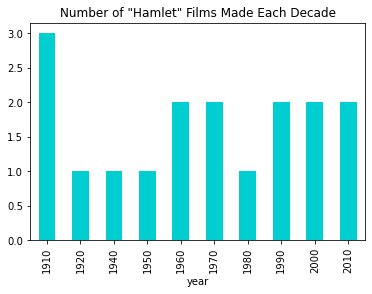

In [12]:
hamlet.groupby(hamlet.year // 10 * 10).size().plot(kind='bar' , color='darkturquoise' , title='Number of "Hamlet" Films Made Each Decade')

Question 5

How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [14]:
byYearsIn1950 = df
byYearsIn1950 = byYearsIn1950[byYearsIn1950.year // 10 == 195]
byYearsIn1950 = byYearsIn1950[byYearsIn1950.n == 1]
byYearsIn1950.groupby(['year', 'type']).size()

year  type   
1950  actor      604
      actress    271
1951  actor      633
      actress    272
1952  actor      591
      actress    284
1953  actor      634
      actress    290
1954  actor      626
      actress    298
1955  actor      606
      actress    264
1956  actor      614
      actress    288
1957  actor      708
      actress    284
1958  actor      694
      actress    275
1959  actor      678
      actress    287
dtype: int64

Q 6

In [16]:
since1990 = df
since1990 = since1990[since1990.year >= 1990]
since1990 = since1990[since1990.n == 1]
((since1990.groupby(['name']).size()).sort_values(ascending=False)).head(10)

name
Mohanlal              126
Mammootty             118
Akshay Kumar           87
Jayaram                76
Andy Lau               72
Ajay Devgn             69
Eric Roberts           68
Amitabh Bachchan       68
Nagarjuna Akkineni     60
Dilip                  59
dtype: int64


Question 7

List, in order by year, each of the films in which Frank Oz has played more than 1 role

In [18]:
frank = df
frank = frank[frank.name == 'Frank Oz']
frank.sort_values('year')
rolesAmount = frank.groupby(['year','title']).size()
rolesAmount[rolesAmount>1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64